In [1]:
!pip install sunpy[all] lime

from IPython.display import clear_output
clear_output()

In [2]:
import numpy as np
import pandas as pd

In [3]:
positive = pd.read_csv('positive2024.csv')
positive["CME"] = 1
negative = pd.read_csv('negative2024.csv')
negative["CME"] = 0

In [4]:
data = pd.concat([positive, negative], ignore_index=True)

In [5]:
data

,Unnamed: 0,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,...,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,HARPNUM,NOAA,Class,Peak Time,CME
0,0,2.246101e+22,107.736,0.021724,15533.100,54.882,2975.118,77.983,0.041413,59.541,...,7.077275e+23,50.329,945.314636,4.805,745.287,377,11158,X2.2,2011.02.14_01:56_TAI,1
1,1,2.235615e+22,93.863,-0.001943,10914.060,44.178,1636.710,56.639,-0.003942,50.680,...,4.733711e+23,43.479,961.502686,4.303,63.441,401,11166,M2.0,2011.03.06_14:30_TAI,1
2,2,6.039302e+22,91.233,0.007535,9912.353,29.044,4229.148,49.560,0.015028,41.150,...,1.074422e+24,35.873,1934.446167,4.865,615.008,393,11164,M3.7,2011.03.06_20:12_TAI,1
3,3,2.384940e+22,109.706,0.009620,3703.910,13.500,1505.331,47.602,0.030907,34.321,...,1.879337e+23,28.525,970.551636,3.971,367.530,637,11226,M2.5,2011.06.06_06:41_TAI,1
4,4,1.989983e+22,109.891,0.032849,12062.610,44.090,2547.054,73.681,0.079865,53.270,...,5.269515e+23,43.929,1259.099854,4.777,1080.528,750,11261,M6.0,2011.08.02_13:48_TAI,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,677,6.795200e+22,101.096,0.004630,10611.240,40.671,5704.324,56.485,0.010575,49.737,...,1.529539e+24,42.969,3722.579590,4.908,502.522,11741,13796,M1.4,2024.08.23_19:30_TAI,0
941,678,1.845254e+22,119.167,-0.013694,6312.821,26.268,1885.399,63.778,-0.033268,43.630,...,2.355738e+23,35.925,711.973083,4.494,384.781,11760,13800,M1.3,2024.08.23_21:46_TAI,0
942,679,1.880357e+22,120.263,-0.014802,6490.694,26.496,1923.503,65.449,-0.035553,43.985,...,2.445216e+23,36.115,741.945557,4.443,419.884,11760,13800,M1.7,2024.08.23_23:24_TAI,0
943,680,5.632520e+22,103.336,0.001849,11282.260,41.831,4292.425,55.562,0.004136,49.858,...,1.345415e+24,42.860,3604.686768,4.625,166.002,11741,13796,M1.4,2024.08.25_11:41_TAI,0


## Plotting histograms to see the variability of the data

In [6]:
data = data.drop(['Unnamed: 0','HARPNUM','NOAA','Class','Peak Time'], axis=1)

In [7]:
X = data.drop(columns=['CME'])
y = data['CME']

In [8]:
from sklearn.preprocessing import MinMaxScaler

def normalize_the_data(data):
    scaler = MinMaxScaler()
    normalized_data = scaler.fit_transform(data)
    return normalized_data

xn = normalize_the_data(X)

In [9]:
columns = ['USFLUX', 'MEANGBT', 'MEANJZH', 'MEANPOT', 'SHRGT45', 'TOTUSJH',
       'MEANGBH', 'MEANALP', 'MEANGAM', 'MEANGBZ', 'MEANJZD', 'TOTUSJZ',
       'SAVNCPP', 'TOTPOT', 'MEANSHR', 'AREA_ACR', 'R_VALUE', 'ABSNJZH','CME']

df = pd.concat([pd.DataFrame(xn), pd.DataFrame(y)], axis=1)
df.columns = columns

df

,USFLUX,MEANGBT,MEANJZH,MEANPOT,SHRGT45,TOTUSJH,MEANGBH,MEANALP,MEANGAM,MEANGBZ,MEANJZD,TOTUSJZ,SAVNCPP,TOTPOT,MEANSHR,AREA_ACR,R_VALUE,ABSNJZH,CME
0,0.110342,0.561371,0.690394,0.580267,0.871939,0.194906,0.753790,0.678962,0.937815,0.588089,0.485318,0.202952,0.089251,0.133011,0.900055,0.128267,0.837254,0.164015,1
1,0.109806,0.406908,0.507880,0.398340,0.699841,0.104333,0.451634,0.462796,0.712539,0.386897,0.506505,0.132131,0.024961,0.088537,0.712075,0.130544,0.749782,0.013869,1
2,0.304362,0.377625,0.580972,0.358886,0.456517,0.279768,0.351421,0.553205,0.470255,0.396149,0.289121,0.311960,0.258430,0.202599,0.503348,0.267394,0.847709,0.135327,1
3,0.117444,0.583305,0.597047,0.114359,0.206602,0.095442,0.323702,0.628887,0.296639,0.515527,0.401939,0.123382,0.146289,0.034370,0.301701,0.131817,0.691932,0.080831,1
4,0.097242,0.585365,0.776187,0.443577,0.698426,0.165938,0.692889,0.862225,0.778385,0.569345,0.665822,0.172255,0.337477,0.098705,0.724424,0.172403,0.832375,0.237837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,0.343026,0.487441,0.558567,0.386413,0.643455,0.379596,0.449454,0.531986,0.688565,0.449967,0.518421,0.477789,0.184328,0.288966,0.698079,0.518906,0.855201,0.110557,0
941,0.089839,0.688645,0.417256,0.217114,0.411885,0.121162,0.552698,0.323026,0.533305,0.676796,0.580121,0.131843,0.103115,0.043411,0.504775,0.095446,0.783063,0.084630,0
942,0.091635,0.700848,0.408711,0.224120,0.415551,0.123741,0.576353,0.312137,0.542330,0.675234,0.552542,0.134881,0.134678,0.045109,0.509989,0.099662,0.774177,0.092359,0
943,0.283556,0.512381,0.537118,0.412842,0.662106,0.284050,0.436388,0.501297,0.691641,0.468449,0.620930,0.369203,0.159974,0.254025,0.695088,0.502323,0.805890,0.036453,0


In [10]:
pos = df[df['CME'] == 1]
neg = df[df['CME'] == 0]

## ANALYSIS

In [11]:
from sklearn.feature_selection import f_classif
from sklearn.datasets import make_classification

X = df.drop(columns=['CME'])
y = df['CME']

from sklearn.feature_selection import SelectKBest, f_classif

N_features = 18
a = np.array(X)
b = np.array(y)

selector = SelectKBest(f_classif, k=N_features)
selector.fit(a,b)
scores = selector.scores_
print(scores)



[1.56101232e+01 1.68459149e+00 2.84670001e+00 1.40416298e+01
 8.16280725e+00 2.71245772e+01 1.25032402e+01 5.01485243e+00
 7.67842904e+00 7.13204650e+00 3.65096837e+00 2.73549564e+01
 3.13871356e-01 2.44550808e+01 8.47224352e+00 2.05725167e+01
 1.70864875e+01 2.26615473e-02]


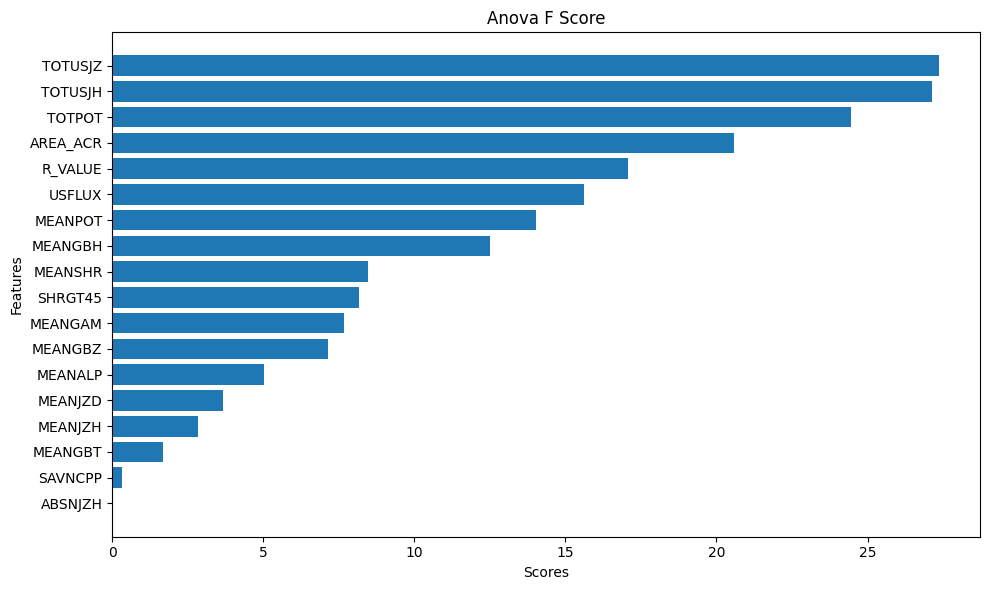

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

feature_names = X.columns
scores_df = pd.DataFrame({'Feature': feature_names, 'Score': scores}).sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(scores_df['Feature'], scores_df['Score'])
plt.xlabel('Scores')
plt.ylabel('Features')
plt.title('Anova F Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

ordered_features = scores_df['Feature'].tolist()
ordered_features.append("CME")

In [13]:
df_reordered = df.loc[:, ordered_features]

In [14]:
df_reordered

,TOTUSJZ,TOTUSJH,TOTPOT,AREA_ACR,R_VALUE,USFLUX,MEANPOT,MEANGBH,MEANSHR,SHRGT45,MEANGAM,MEANGBZ,MEANALP,MEANJZD,MEANJZH,MEANGBT,SAVNCPP,ABSNJZH,CME
0,0.202952,0.194906,0.133011,0.128267,0.837254,0.110342,0.580267,0.753790,0.900055,0.871939,0.937815,0.588089,0.678962,0.485318,0.690394,0.561371,0.089251,0.164015,1
1,0.132131,0.104333,0.088537,0.130544,0.749782,0.109806,0.398340,0.451634,0.712075,0.699841,0.712539,0.386897,0.462796,0.506505,0.507880,0.406908,0.024961,0.013869,1
2,0.311960,0.279768,0.202599,0.267394,0.847709,0.304362,0.358886,0.351421,0.503348,0.456517,0.470255,0.396149,0.553205,0.289121,0.580972,0.377625,0.258430,0.135327,1
3,0.123382,0.095442,0.034370,0.131817,0.691932,0.117444,0.114359,0.323702,0.301701,0.206602,0.296639,0.515527,0.628887,0.401939,0.597047,0.583305,0.146289,0.080831,1
4,0.172255,0.165938,0.098705,0.172403,0.832375,0.097242,0.443577,0.692889,0.724424,0.698426,0.778385,0.569345,0.862225,0.665822,0.776187,0.585365,0.337477,0.237837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,0.477789,0.379596,0.288966,0.518906,0.855201,0.343026,0.386413,0.449454,0.698079,0.643455,0.688565,0.449967,0.531986,0.518421,0.558567,0.487441,0.184328,0.110557,0
941,0.131843,0.121162,0.043411,0.095446,0.783063,0.089839,0.217114,0.552698,0.504775,0.411885,0.533305,0.676796,0.323026,0.580121,0.417256,0.688645,0.103115,0.084630,0
942,0.134881,0.123741,0.045109,0.099662,0.774177,0.091635,0.224120,0.576353,0.509989,0.415551,0.542330,0.675234,0.312137,0.552542,0.408711,0.700848,0.134678,0.092359,0
943,0.369203,0.284050,0.254025,0.502323,0.805890,0.283556,0.412842,0.436388,0.695088,0.662106,0.691641,0.468449,0.501297,0.620930,0.537118,0.512381,0.159974,0.036453,0


In [15]:
pos = df_reordered[df_reordered['CME'] == 1]
neg = df_reordered[df_reordered['CME'] == 0]

In [16]:
min_a = pos.index.min()
max_a = pos.index.max()

pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)

min_b = neg.index.min()
max_b = neg.index.max()

neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)

/tmp/ipykernel_27244/2878712047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos['normalized_event_number'] = (pos.index - min_a) / (max_a - min_a)
/tmp/ipykernel_27244/2878712047.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neg['normalized_event_number'] = (neg.index - min_b) / (max_b - min_b)


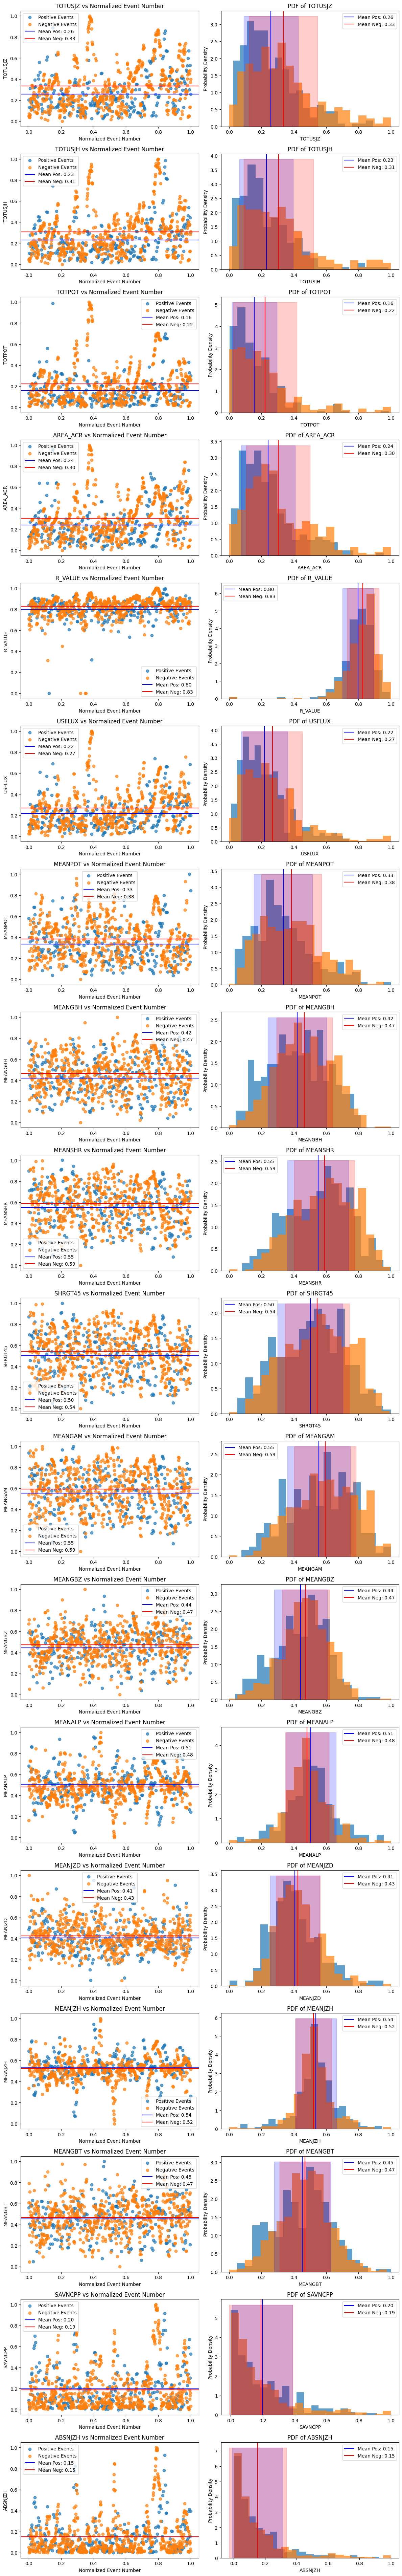

In [18]:
import numpy as np
import matplotlib.pyplot as plt

a = 1
plt.figure(figsize=(12, 80))

for i in range(len(columns) - 1):
    mean_pos = np.mean(pos.iloc[:, i])
    mean_neg = np.mean(neg.iloc[:, i])
    std_pos = np.std(pos.iloc[:,i])
    std_neg = np.std(neg.iloc[:,i])

    plt.subplot(len(columns), 2, a)
    plt.scatter(pos["normalized_event_number"], pos.iloc[:, i], alpha=0.7, label="Positive Events")
    plt.scatter(neg["normalized_event_number"], neg.iloc[:, i], alpha=0.7, label="Negative Events")
    plt.axhline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axhline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    plt.xlabel("Normalized Event Number")
    plt.ylabel(ordered_features[i])
    plt.title(f"{ordered_features[i]} vs Normalized Event Number")
    plt.legend()

    plt.subplot(len(columns), 2, a + 1)
    plt.hist(pos.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.hist(neg.iloc[:, i], bins=20, density=True, alpha=0.7)
    plt.axvline(mean_pos, color='b', label=f"Mean Pos: {mean_pos:.2f}")
    plt.axvline(mean_neg, color='r', label=f"Mean Neg: {mean_neg:.2f}")
    ymin, ymax = plt.ylim()
    plt.fill_betweenx([ymin, ymax], mean_pos - std_pos, mean_pos + std_pos, color='b', alpha=0.2)
    plt.fill_betweenx([ymin, ymax], mean_neg - std_neg, mean_neg + std_neg, color='r', alpha=0.2)
    plt.xlabel(ordered_features[i])
    plt.ylabel('Probability Density')
    plt.title(f'PDF of {ordered_features[i]}')
    plt.legend()

    a += 2

plt.tight_layout()
plt.savefig("2024_parameters_pdf.jpeg")
plt.show()